To perform Image Enhancement(SD) Neighbourhood Processing Techniques: 
Smoothing Operators

Add Gaussian Noise, Remove using Averaging Filter

Add Salt & Pepper Noise, Remove using Median Filter 


In [ ]:
import cv2, argparse
import numpy as np
import matplotlib.pyplot as plt
import random

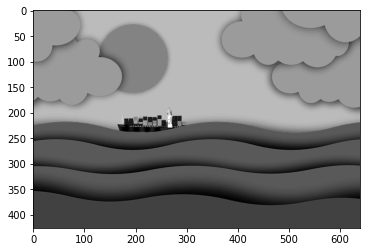

In [ ]:
img = cv2.imread('IMG.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = "gray")

In [ ]:
img.shape

(426, 640)

In [ ]:
m,n = img.shape

In [ ]:
img

array([[168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       ...,
       [ 94,  94,  94, ...,  94,  94,  94],
       [ 94,  94,  94, ...,  94,  94,  94],
       [ 94,  94,  94, ...,  94,  94,  94]], dtype=uint8)

Add Gaussian Noise

In [ ]:
gauss_noise=np.zeros((426,640),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [ ]:
gn_img=cv2.add(img,gauss_noise)

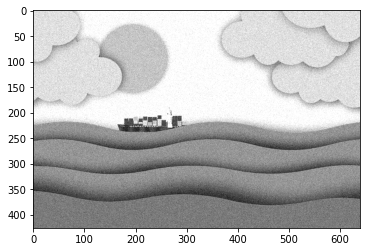

In [ ]:
plt.imshow(gn_img,cmap = "gray")

In [ ]:
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

Remove It using Averaging Filter

In [ ]:
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)


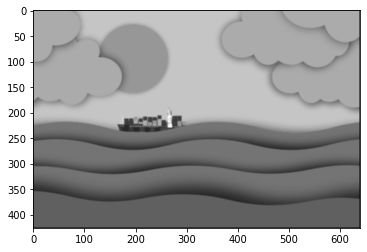

In [ ]:
plt.imshow(img_new,cmap = "gray")

Adding Salt and Pepper Noise


In [ ]:
def add_noise(img):

	row , col = img.shape
	
	number_of_pixels = random.randint(30, 100)
	for i in range(number_of_pixels):
		
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255

	number_of_pixels = random.randint(30 , 100)
	for i in range(number_of_pixels):
		
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

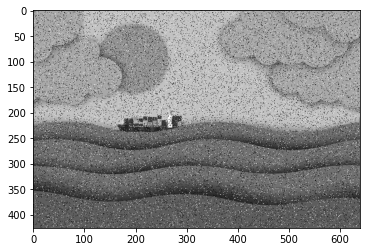

In [ ]:
plt.imshow(img,cmap = "gray")

Remove it Median Filter


In [ ]:
img_noisy1 = cv2.imread('IMG.jpg', 0)
  
m, n = img_noisy1.shape
   
img_new1 = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
               img_noisy1[i-1, j],
               img_noisy1[i-1, j + 1],
               img_noisy1[i, j-1],
               img_noisy1[i, j],
               img_noisy1[i, j + 1],
               img_noisy1[i + 1, j-1],
               img_noisy1[i + 1, j],
               img_noisy1[i + 1, j + 1]]
          
        temp = sorted(temp)
        img_new1[i, j]= temp[4]
  
img_new1 = img_new1.astype(np.uint8)

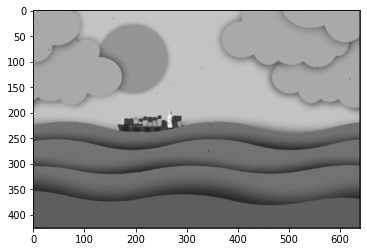

In [ ]:
plt.imshow(img_new1,cmap = "gray")